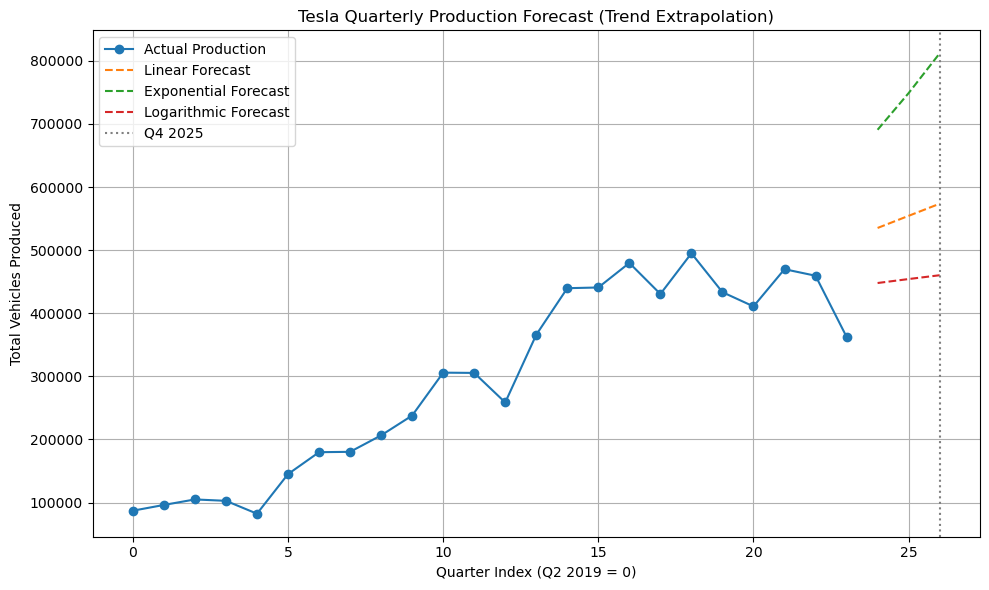

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv("tesla_production.csv")
df["Production"] = df["Total Production"].str.replace(",", "").astype(int)

# Create a time index starting from 0 (Q2 2019) to the most recent quarter.
df["TimeIndex"] = np.arange(len(df))

# Fitting Linear Model
X_linear = sm.add_constant(df["TimeIndex"])
linear_model = sm.OLS(df["Production"], X_linear).fit()

# Fitting Exponential Model
log_prod = np.log(df["Production"])
exp_model = sm.OLS(log_prod, X_linear).fit()

# Fitting Logarithmic Model
df_nonzero = df[df["TimeIndex"] > 0]  # log(0) is undefined
X_log = sm.add_constant(np.log(df_nonzero["TimeIndex"]))
log_model = sm.OLS(df_nonzero["Production"], X_log).fit()

# Forecast through Q4 2025
future_time = np.arange(len(df), 27)
X_future = sm.add_constant(future_time)
X_future_log = sm.add_constant(np.log(future_time))

# Predict Q4 2025 values using each model
linear_pred = linear_model.predict(X_future)
exp_pred = np.exp(exp_model.predict(X_future))  # Exponentiate to undo log
log_pred = log_model.predict(X_future_log)

# Visual comparison of actual vs forecasted production
plt.figure(figsize=(10, 6))
plt.plot(df["TimeIndex"], df["Production"], label="Actual Production", marker="o")
plt.plot(future_time, linear_pred, label="Linear Forecast", linestyle="--")
plt.plot(future_time, exp_pred, label="Exponential Forecast", linestyle="--")
plt.plot(future_time, log_pred, label="Logarithmic Forecast", linestyle="--")
plt.axvline(x=26, color='gray', linestyle=':', label="Q4 2025")
plt.title("Tesla Quarterly Production Forecast (Trend Extrapolation)")
plt.xlabel("Quarter Index (Q2 2019 = 0)")
plt.ylabel("Total Vehicles Produced")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Evaluate model fit on training data using RMSE
from sklearn.metrics import mean_squared_error

# Predict on existing data
linear_fit = linear_model.predict(X_linear)
exp_fit = np.exp(exp_model.predict(X_linear))
log_fit = log_model.predict(X_log)

# Calculate RMSE for each model
rmse_linear = np.sqrt(mean_squared_error(df["Production"], linear_fit))
rmse_exp = np.sqrt(mean_squared_error(df["Production"], exp_fit))
rmse_log = np.sqrt(mean_squared_error(df_nonzero["Production"], log_fit))

# Forecast value for Q4 2025 (index 26)
q4_2025_index = 26
linear_forecast = linear_model.predict([1, q4_2025_index])[0]
exp_forecast = np.exp(exp_model.predict([1, q4_2025_index])[0])
log_forecast = log_model.predict([1, np.log(q4_2025_index)])[0]

{
    "RMSE": {
        "Linear": rmse_linear,
        "Exponential": rmse_exp,
        "Logarithmic": rmse_log
    },
    "Q4 2025 Forecast": {
        "Linear": linear_forecast,
        "Exponential": exp_forecast,
        "Logarithmic": log_forecast
    }
}


{'RMSE': {'Linear': np.float64(55020.15916779185),
  'Exponential': np.float64(86140.75055775674),
  'Logarithmic': np.float64(64526.47410830645)},
 'Q4 2025 Forecast': {'Linear': np.float64(573589.8134782608),
  'Exponential': np.float64(811902.4670240214),
  'Logarithmic': np.float64(460228.19456041)}}